# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
data_dir = "https://dlsun.github.io/pods/data/"
df = pd.read_csv(data_dir + "titanic.csv")

In [2]:
df

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


In [3]:
df['class'].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [4]:
# Code here
passenger = ['1st', '2nd', '3rd']
df_passenger = df[df['class'].isin(passenger)]

In [5]:
df_passenger['class'].unique()

array(['3rd', '2nd', '1st'], dtype=object)

In [6]:
df_passenger.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [7]:
crosstab = pd.crosstab(df_passenger['class'], df_passenger['embarked'])
print(crosstab)

embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494
embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [8]:
# Code here
# Cross-tabulation of class by embarkation
class_given_embarked = pd.crosstab(df_passenger['embarked'], df_passenger['class'])

# Normalize to get conditional distribution
conditional_class_given_embarked = class_given_embarked.div(class_given_embarked.sum(axis=1), axis=0)

print("Conditional Distribution of Class Given Where They Embarked:")
print(conditional_class_given_embarked)


Conditional Distribution of Class Given Where They Embarked:
class          1st       2nd       3rd
embarked                              
B         0.333333  0.666667  0.000000
C         0.527675  0.095941  0.376384
Q         0.024390  0.056911  0.918699
S         0.191466  0.268053  0.540481
Conditional Distribution of Class Given Where They Embarked:
class          1st       2nd       3rd
embarked                              
B         0.333333  0.666667  0.000000
C         0.527675  0.095941  0.376384
Q         0.024390  0.056911  0.918699
S         0.191466  0.268053  0.540481


In [9]:
# Cross-tabulation of embarkation by class
embarked_given_class = pd.crosstab(df_passenger['class'], df_passenger['embarked'])

# Normalize to get conditional distribution
conditional_embarked_given_class = embarked_given_class.div(embarked_given_class.sum(axis=1), axis=0)

print("Conditional Distribution of Where They Embarked Given Their Class:")
print(conditional_embarked_given_class)

Conditional Distribution of Where They Embarked Given Their Class:
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756
Conditional Distribution of Where They Embarked Given Their Class:
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


- about 70% of 3rd class passengers embarked at Southampton
- about 54% of Southampton passengers are in 3rd class

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [10]:
from plotnine import *

# Reset the index to prepare for plotting
conditional_class_given_embarked = conditional_class_given_embarked.reset_index()
conditional_class_given_embarked = conditional_class_given_embarked.reset_index(drop=True)


In [11]:
conditional_class_given_embarked

class,embarked,1st,2nd,3rd
0,B,0.333333,0.666667,0.000000
1,C,0.527675,0.095941,0.376384
2,Q,0.024390,0.056911,0.918699
3,S,0.191466,0.268053,0.540481


In [12]:
# Melt the DataFrame for easier plotting with plotnine
melted_data = conditional_class_given_embarked.melt(id_vars='embarked', var_name='class', value_name='probability')

In [13]:
melted_data

,embarked,class,probability
0,B,1st,0.333333
1,C,1st,0.527675
2,Q,1st,0.024390
3,S,1st,0.191466
4,B,2nd,0.666667
5,C,2nd,0.095941
6,Q,2nd,0.056911
7,S,2nd,0.268053
8,B,3rd,0.000000
9,C,3rd,0.376384


C:\Users\tcjen\anaconda3\Lib\pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


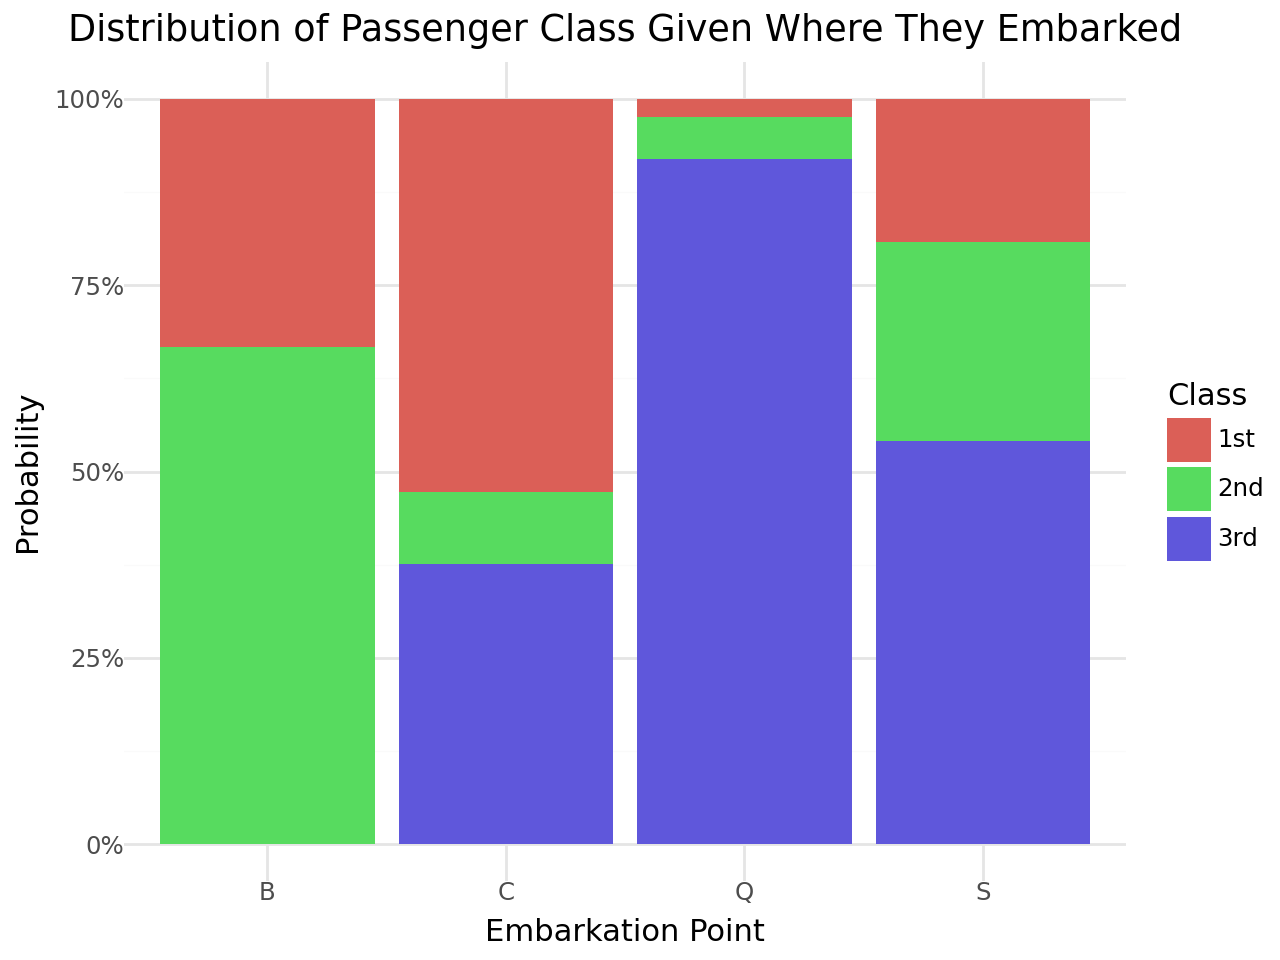

In [14]:
# Code here
# Create a stacked bar plot using plotnine
plot = (
    ggplot(melted_data, aes(x='embarked', y='probability', fill='class')) +
    geom_bar(stat='identity', position='fill') +  
    labs(title='Distribution of Passenger Class Given Where They Embarked',
         x='Embarkation Point',
         y='Probability') +
    scale_y_continuous(labels=lambda x: [f'{int(i * 100)}%' for i in x]) +  # Format y-axis as percentage
    theme_minimal() +
    theme(legend_title=element_text(text='Class'))
)

It is easier to visualize and calculate the probability using the graph, however, it doesn't shoe the exact percentage, so if we want to be precise with the number, it's better to use the previous method
